In [ ]:
import os
import numpy as np
from pymongo import MongoClient
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
n_beads = 4
level = 2
client = MongoClient("mongodb://localhost:27017")
database = client.get_database(f"molecules-{n_beads}")
collection = database.get_collection(f"level-{level}")

In [ ]:
number_of_molecules = {2: 136870880, 1: 6742680, 0: 89960}[level]
print(f'Number of documents: {number_of_molecules}')

In [5]:
select = {"latent_space": 1, "name": 1}
cursor = list(collection.find({}, select) if number_of_molecules < 500_000 else collection.aggregate([{"$sample": {"size": 500_000}}, {"$project": select}]))
full_latent_spaces = np.array([m["latent_space"] for m in cursor])
full_names = [m["name"] for m in cursor]

In [6]:
kmeans = KMeans(n_clusters=50, random_state=0, n_init="auto").fit(full_latent_spaces)
kmeans_center = kmeans.cluster_centers_
clostest_indices = np.argmin(np.linalg.norm(full_latent_spaces - kmeans_center[:, np.newaxis], axis=2), axis=1)
selected_molecules = [full_names[i] for i in clostest_indices]
selected_latent_spaces = full_latent_spaces[clostest_indices]

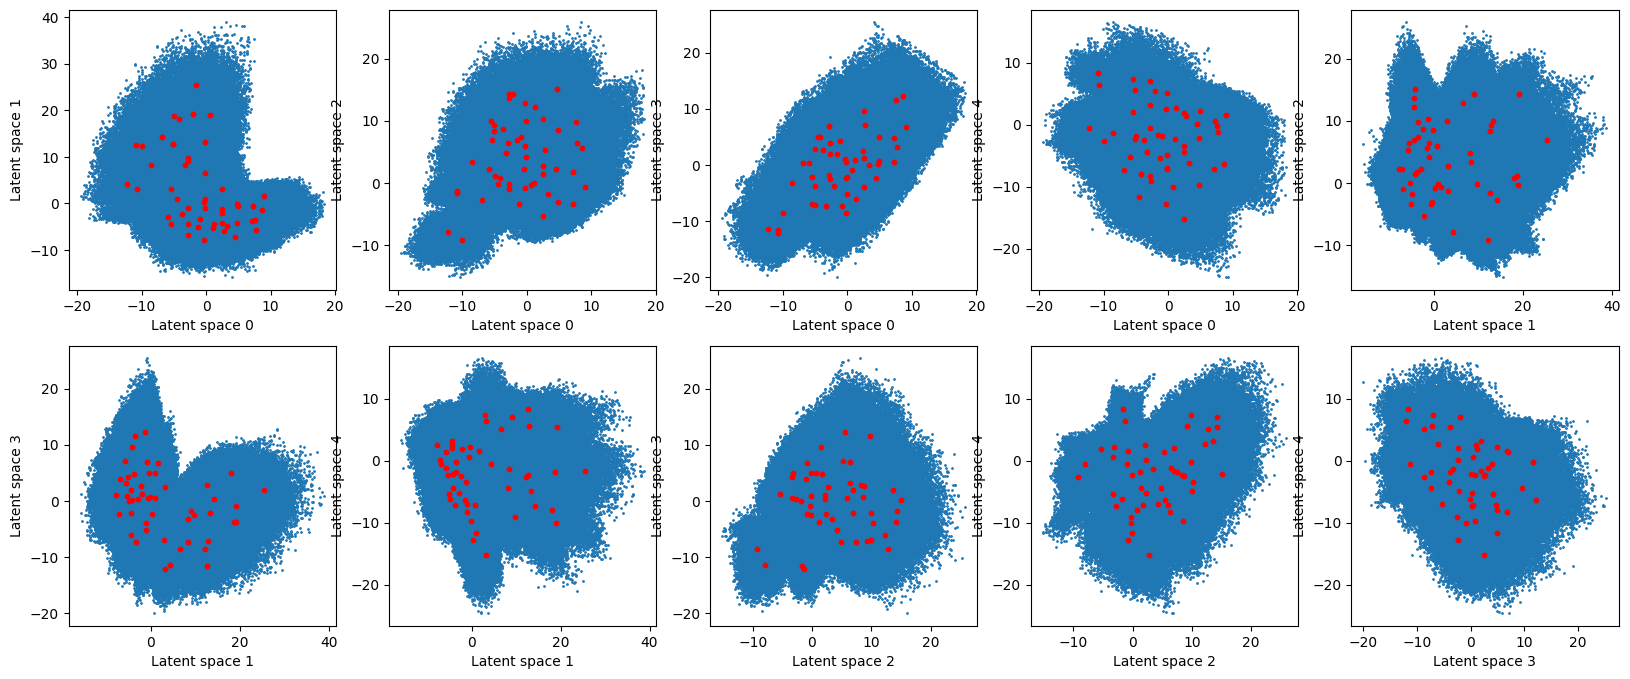

In [7]:
fig, axs = plt.subplots(ncols=5, nrows=2, figsize=(20, 8))
count = 0
for i in range(5):
	for j in range(i + 1, 5):
		ax = axs[count // 5, count % 5]
		ax.scatter(full_latent_spaces[:, i], full_latent_spaces[:, j], s=1)
		ax.scatter(selected_latent_spaces[:, i], selected_latent_spaces[:, j], c='red', s=10)
		ax.set_xlabel(f'Latent space {i}')
		ax.set_ylabel(f'Latent space {j}')
		count += 1
plt.show()

In [ ]:
with open('molecules-single-level.list', 'w') as f:	
	for molecule in selected_molecules:
		print(molecule)
		os.makedirs(f'simulations/level-{level}/{molecule.replace(" ", "_")}', exist_ok=True)
		f.write(molecule.replace(" ", "_") + '\n')

SP6 TC5 TC6 TQ3+,0-3 1-2 1-3 2-3
C5 Q2- Q3- TP4,0-2 0-3 1-3 2-3
P4 SN5 TC5 X4,0-1 0-2 0-3 1-2 1-3 2-3
Q2+ SX3 TC6 TX4,0-1 0-2 0-3 1-3 2-3
SP1 SP3 SP5 TQ5-,0-1 0-2 0-3 1-3
C1 P4 SQ1- TC6,0-1 0-2 2-3
P6 SP2 SQ2- X2,0-1 0-3 1-2 1-3
N4 SN2 TX3 X1,0-1 1-2 2-3
N2 P2 P6 SX3,0-2 0-3 1-2 2-3
P6 Q4+ SX2 SX3,0-2 1-2 1-3
C4 P2 Q1+ TC5,0-2 1-2 1-3
P5 TC5 TQ2+ TQ4-,0-1 0-2 0-3 2-3
Q2+ SN1 TQ4- TX2,0-1 1-2 2-3
SP2 SQ2- TP6 TX2,0-1 0-2 0-3 1-3
C1 SQ4- TC6 TP4,0-2 0-3 1-3 2-3
N1 Q4+ SC5 X1,0-1 0-3 1-3 2-3
Q4- SN1 TX2 X2,0-1 0-3 1-2 1-3 2-3
Q3+ Q4- SP5 SQ2+,0-2 0-3 1-2 1-3 2-3
Q1- TN1 TN1 TP4,0-1 0-2 0-3 1-2
SC6 SX4 TC5 TP3,0-1 1-3 2-3
C1 SC6 TQ4+ TQ5+,0-2 0-3 1-2
SP5 TC5 TQ5- TX4,0-1 1-2 2-3
P4 SN1 X2 X2,0-2 0-3 1-3 2-3
Q5+ SQ3- SQ4+ TC5,0-2 0-3 1-2 2-3
Q2- Q3- TP5 X2,0-1 0-2 1-2 2-3
C5 SN5 SX2 X3,0-1 1-2 2-3
Q4+ SN4 TX3 X4,0-1 0-2 0-3 1-2 1-3 2-3
P5 Q3- SQ2+ TC5,0-2 0-3 1-3
C5 Q5- SC5 TQ3+,0-2 0-3 1-2 1-3 2-3
P5 Q2- SP2 SX2,0-1 0-3 2-3
C3 TN1 TN2 TP6,0-1 0-2 1-3 2-3
P2 SQ2+ TC5 TP6,0-1 0-2 0-3 1-3
SP2